In [1]:
import pandas as pd
#simple plot of measures by point
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [2]:
def plot_data(column_to_plot, df_data, columns_with_measures, name_export):
    plt.clf()
    
    fig, axes = plt.subplots(figsize=(20, 12))

    columns_to_data = columns_with_measures + [column_to_plot]
    df_to_plot = df_data[columns_to_data]
    df_to_plot = df_to_plot.dropna()

    columns_with_measures_values = ["Día 1-M", "Día 1-T", "Día 2-M", "Día 2-T"]
    list_df = []

    for element in df_to_plot[column_to_plot].unique():
        filter_data = df_to_plot.loc[df_to_plot[column_to_plot] == element]

        filter_data = filter_data[columns_with_measures]
        #filter_data = filter_data.mean()

        filter_data.columns = columns_with_measures_values
        df_rows = []

        for column in columns_with_measures_values:
            df_row = pd.DataFrame()
            df_row['Measure'] = filter_data[column]
            df_row['Type measure'] = column
            df_row[column_to_plot] = element

            df_rows.append(df_row)
        
        df_element = pd.concat(df_rows, axis=0)
        list_df.append(df_element)

    df_concat = pd.concat(list_df, axis=0)

    sns.lineplot(data=df_concat, x="Type measure", y="Measure", linewidth = 3, hue=column_to_plot, err_style="bars", errorbar=("se", 2))

    plt.savefig(name_export, dpi=300)


In [3]:
columns_with_measures = ['m1', 'm2', 'm3', 'm4']
df_data = pd.read_csv("../relevant_results/input_data_post_filter/data_with_features.csv")

In [4]:
df_data_filter_ads = df_data[['m1', 'm2', 'm3', 'm4', 'Apego_dic_ADS']]


<Axes: xlabel='m4'>

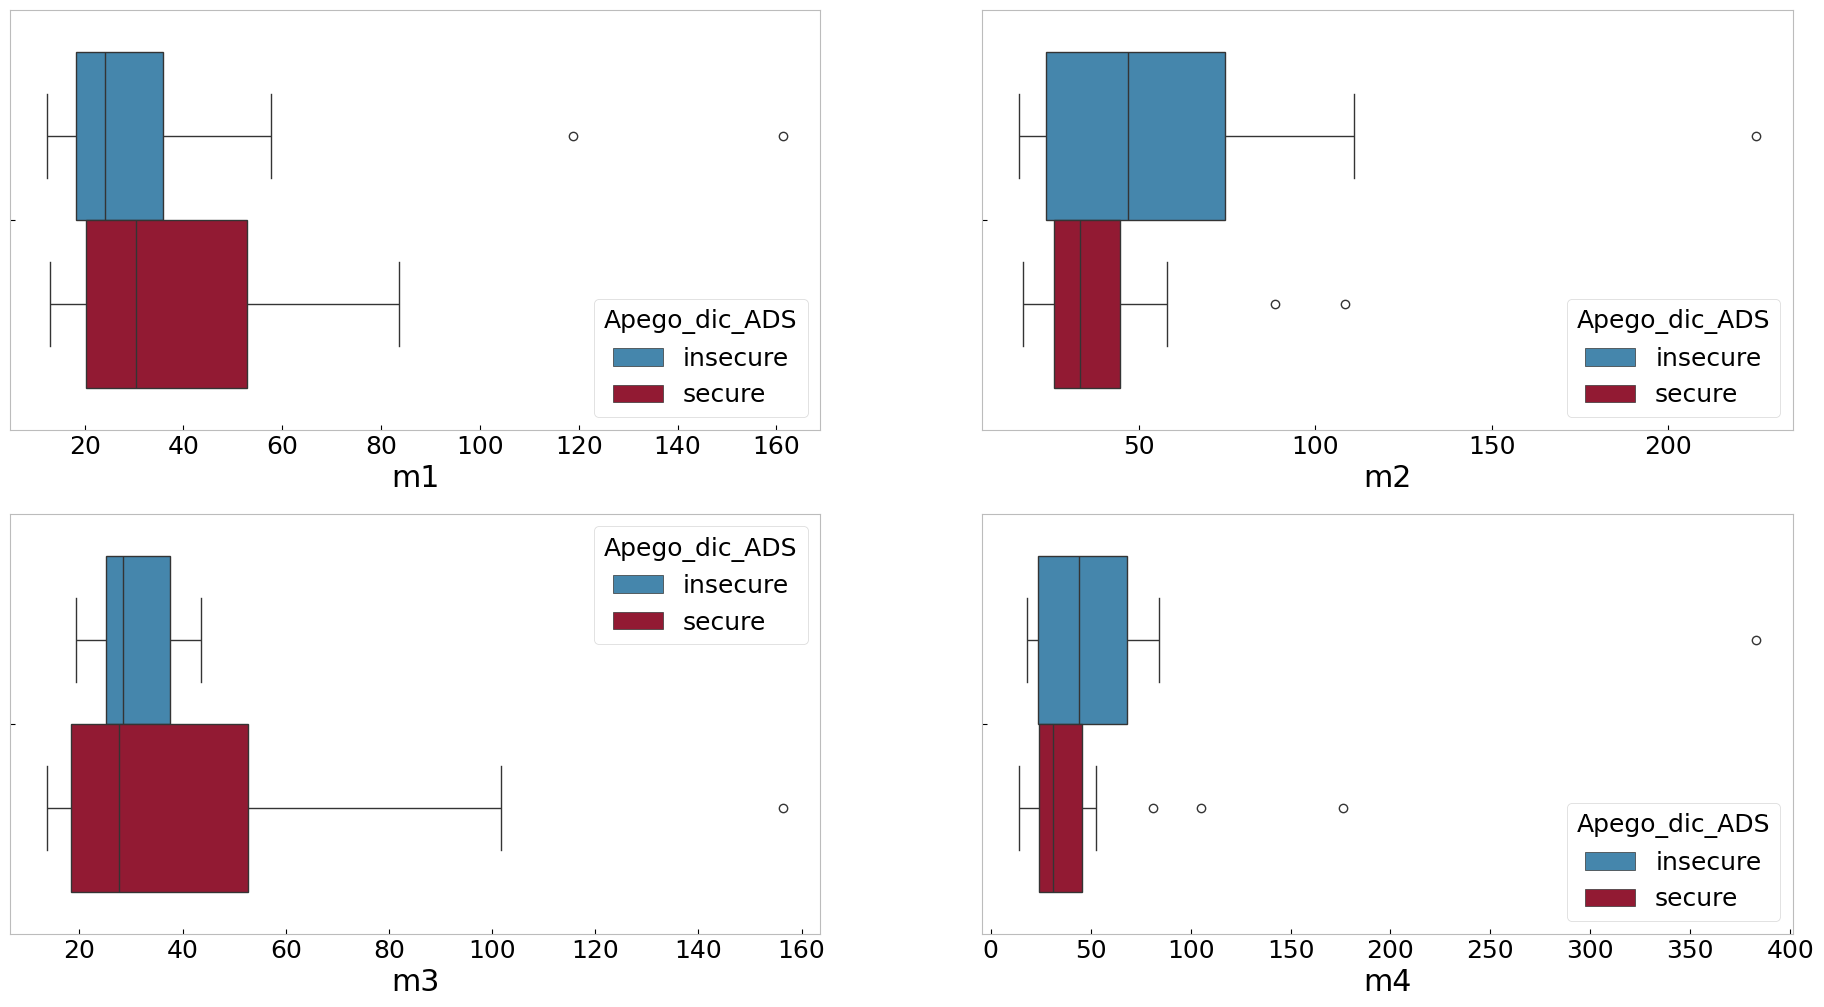

In [6]:
df_data_filter_ads = df_data[['m1', 'm2', 'm3', 'm4', 'Apego_dic_ADS']]

fig, axes = plt.subplots(2, 2, figsize=(23, 12))

sns.boxplot(ax=axes[0][0], data=df_data_filter_ads, x="m1", hue="Apego_dic_ADS")
sns.boxplot(ax=axes[0][1], data=df_data_filter_ads, x="m2", hue="Apego_dic_ADS")
sns.boxplot(ax=axes[1][0], data=df_data_filter_ads, x="m3", hue="Apego_dic_ADS")
sns.boxplot(ax=axes[1][1], data=df_data_filter_ads, x="m4", hue="Apego_dic_ADS")

<Axes: xlabel='m4'>

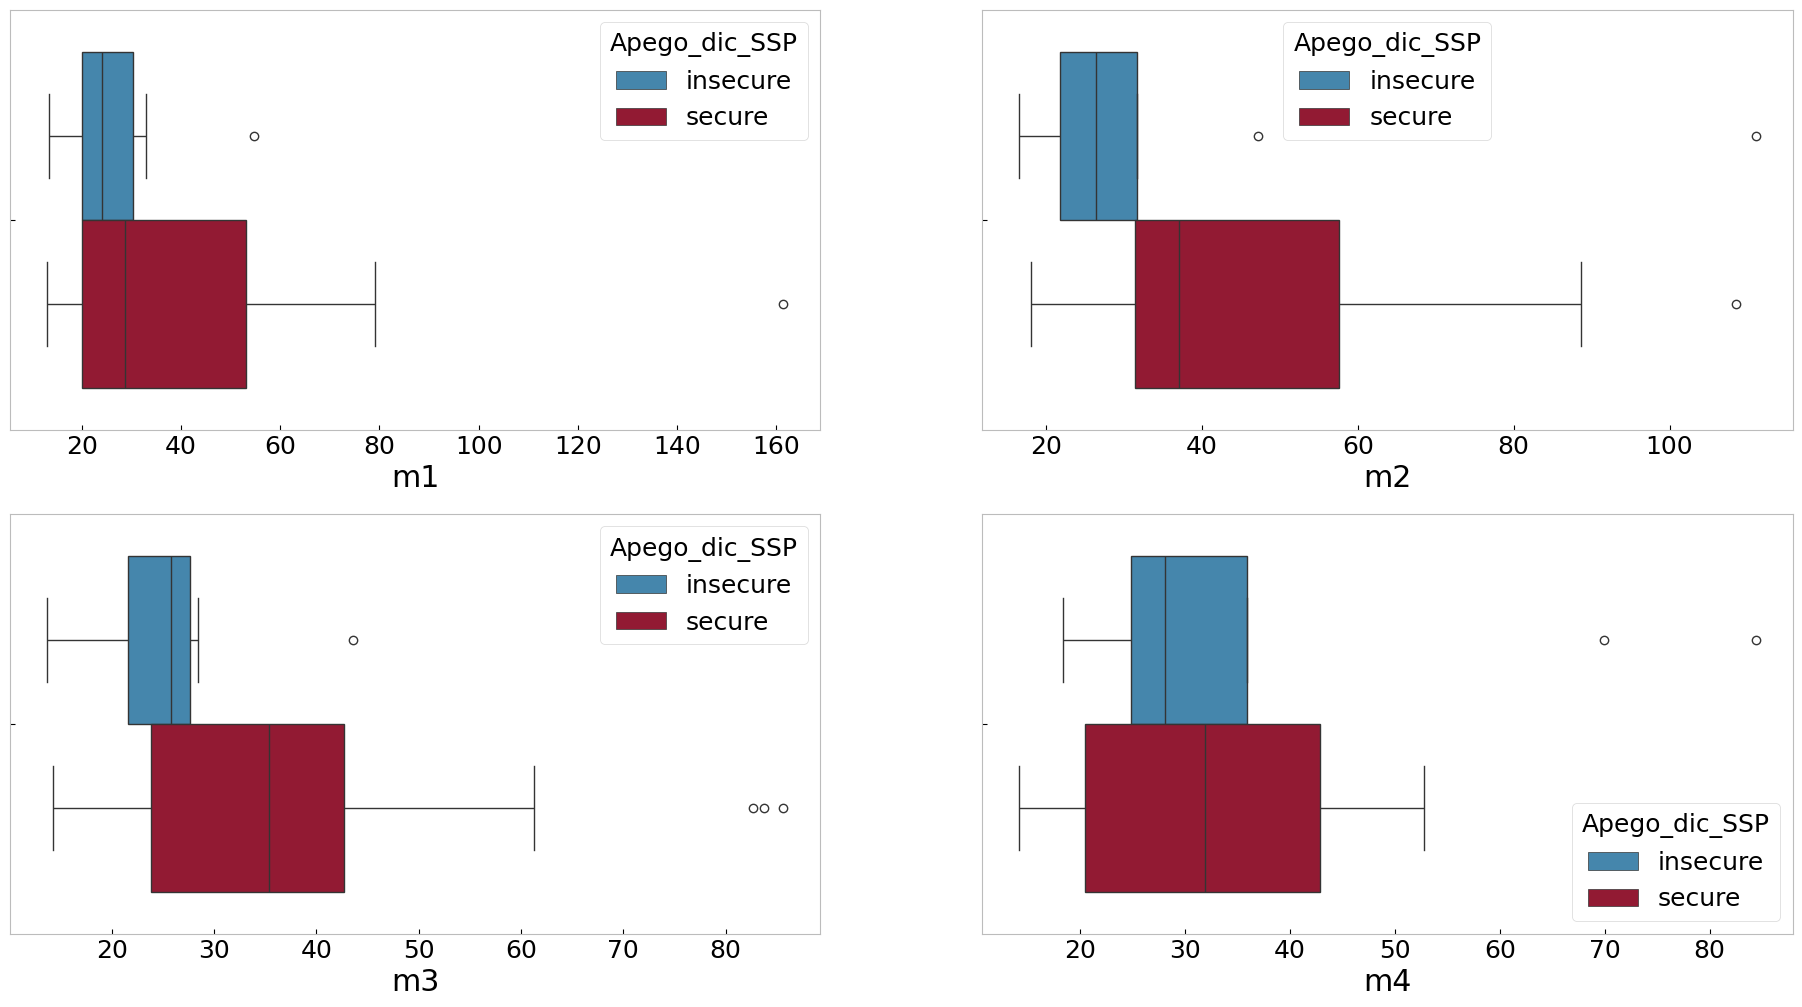

In [7]:
df_data_filter = df_data[['m1', 'm2', 'm3', 'm4', 'Apego_dic_SSP']]

fig, axes = plt.subplots(2, 2, figsize=(23, 12))

sns.boxplot(ax=axes[0][0], data=df_data_filter, x="m1", hue="Apego_dic_SSP")
sns.boxplot(ax=axes[0][1], data=df_data_filter, x="m2", hue="Apego_dic_SSP")
sns.boxplot(ax=axes[1][0], data=df_data_filter, x="m3", hue="Apego_dic_SSP")
sns.boxplot(ax=axes[1][1], data=df_data_filter, x="m4", hue="Apego_dic_SSP")


In [8]:
df_data_filter.describe()

,m1,m2,m3,m4
count,35.000000,35.000000,35.000000,35.000000
mean,39.749421,47.213491,39.006348,52.728307
std,32.640904,39.429564,29.965480,65.579455
min,12.355559,16.153182,13.673068,14.171518
25%,19.697087,25.405997,22.526444,24.264242
50%,26.747838,35.309869,28.361209,32.712742
75%,52.881324,51.503357,39.006348,52.728307
max,161.424693,224.737565,156.480231,382.715268


/tmp/ipykernel_6068/4293451542.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(figsize=(20, 12))


<Figure size 640x480 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

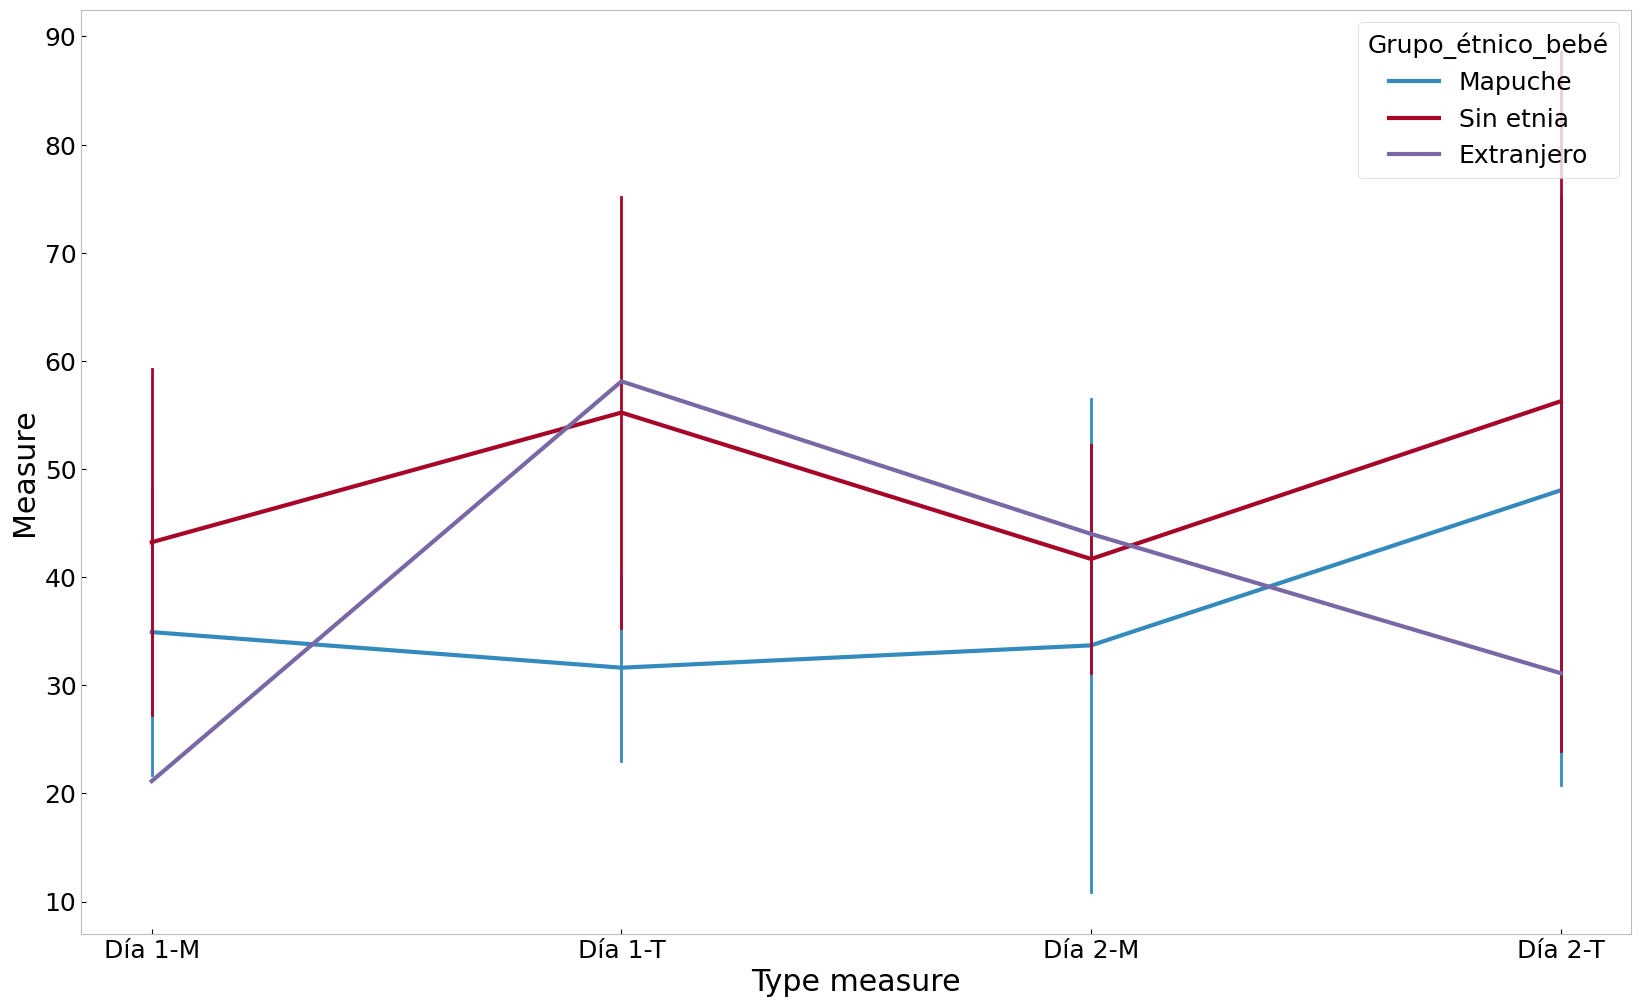

In [9]:
for column in df_data.columns:
    if column not in ['id_name','m1','m2','m3','m4','N°_diada']:
        name_export = "../relevant_results/plots_data/{}.png".format(column)
        plot_data(column, df_data, columns_with_measures, name_export)